# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** Szymon Gładysz

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

from importlib import reload
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


Współczynniki wielomianu o pierwiastkach 1, 2, 3: [-6. 11. -6.  1.]
Współczynniki wielomianu o pierwiastkach od 1 do 20: [ 2.43290201e+18 -8.75294804e+18  1.38037598e+19 -1.28709312e+19
  8.03781182e+18 -3.59997952e+18  1.20664780e+18 -3.11333643e+17
  6.30308121e+16 -1.01422999e+16  1.30753501e+15 -1.35585183e+14
  1.13102770e+13 -7.56111184e+11  4.01717716e+10 -1.67228082e+09
  5.33279460e+07 -1.25685000e+06  2.06150000e+04 -2.10000000e+02
  1.00000000e+00]
Zaburzenia: 8.222806329546038e-11
Współczynniki wielomianu z zaburzeniami: [-6. 11. -6.  1.]


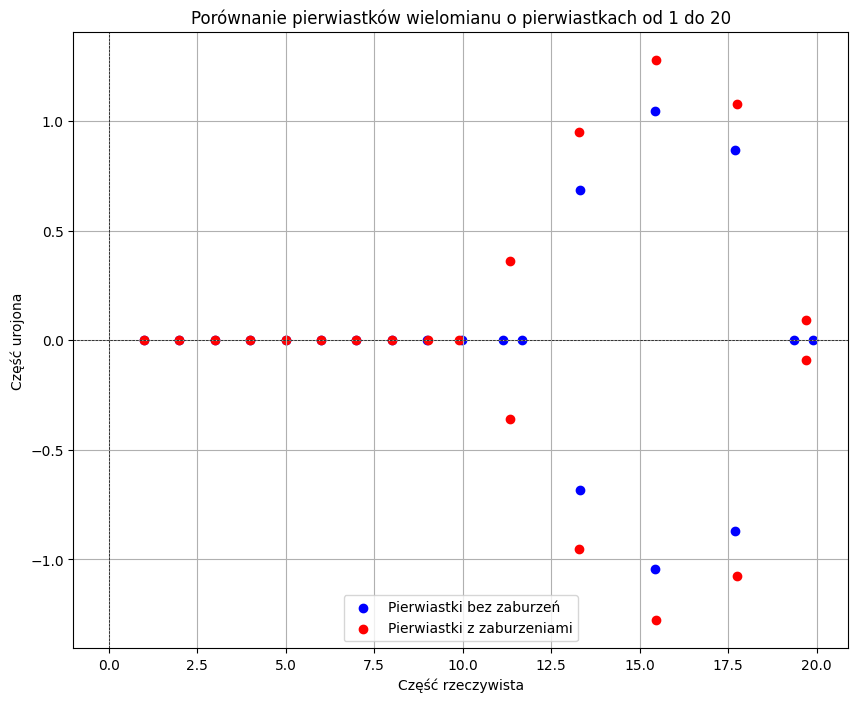

In [2]:
# ===== Twoja implementacja tutaj =====
#Punkt 1
a1 = nppoly.polyfromroots([1,2,3])
print("Współczynniki wielomianu o pierwiastkach 1, 2, 3:", a1)
zeros = []
for i in range(1, 21):
    zeros.append(i)
a2 = nppoly.polyfromroots(zeros)
print("Współczynniki wielomianu o pierwiastkach od 1 do 20:", a2)
#Punkt 2
zaburzenia = np.random.random_sample()*(1e-10)
print("Zaburzenia:", zaburzenia)
print("Współczynniki wielomianu z zaburzeniami:", a1 + zaburzenia)
#Punkt 3
zera = []
zaburzenie, zera = main.roots_20(a2)
zaburzenia2, zera2 = main.roots_20(zaburzenie)
real_zera = [z.real for z in zera]
real_zera2 = [z.real for z in zera2]
complex_zera = [z.imag for z in zera]
complex_zera2 = [z.imag for z in zera2]

plt.figure(figsize=(10,8))
plt.scatter(real_zera, complex_zera, color='blue', label='Pierwiastki bez zaburzeń')
plt.scatter(real_zera2, complex_zera2, color='red', label='Pierwiastki z zaburzeniami')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.title('Porównanie pierwiastków wielomianu o pierwiastkach od 1 do 20')
plt.xlabel('Część rzeczywista')
plt.ylabel('Część urojona')
plt.legend()
plt.grid()
plt.show()

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

Współczynniki wielomianu: [  1.  -8.  28. -56.  70. -56.  28.  -8.   1.]
Macierz Frobeniusa dla wielomianu o pierwiastkach 1 (8-krotnie):
[[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]
wartpości własne macierzy Frobeniusa: [1.01904738+0.00796691j 1.01904738-0.00796691j 1.00770347+0.01904716j
 1.00770347-0.01904716j 0.99203361+0.01878426j 0.99203361-0.01878426j
 0.98121553+0.00770398j 0.98121553-0.00770398j]

wartości własne postaci Schura macierzy Frobeniusa: [1.01896519+0.00796366j 1.00763966+0.01898228j 0.9920388 +0.01868756j
 1.01898218-0.00791991j 0.98129171+0.00764208j 0.98131261-0.00768975j
 1.0076834 -0.01896141j 0.99208646-0.01870452j]

Pierwiastki wielomianu: [0.97789688-0.00901967j 0

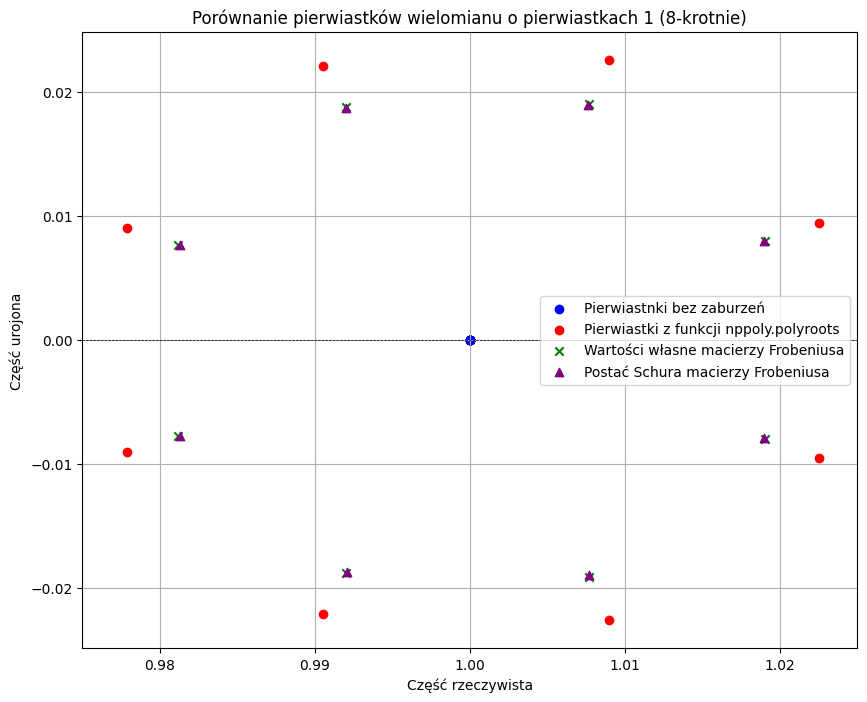

In [3]:
# ===== Twoja implementacja tutaj =====
# Punkt 1
reload(main)
a3 = []
for i in range(8):
    a3.append(1)
a3_poly = nppoly.polyfromroots(a3)
print("Współczynniki wielomianu:", a3_poly)
a3_array = np.array(a3_poly)
print("Macierz Frobeniusa dla wielomianu o pierwiastkach 1 (8-krotnie):")
print(main.frob_a(a3_array))
# Punkt 2
eigenvalues = np.linalg.eigvals(main.frob_a(a3_array))
print("wartpości własne macierzy Frobeniusa:", eigenvalues)
Schur_A = sp.linalg.schur(main.frob_a(a3_array), output='complex')
Schur = np.diag(Schur_A[0])
print("\nwartości własne postaci Schura macierzy Frobeniusa:", Schur)
a3_roots = nppoly.polyroots(a3_poly)
print("\nPierwiastki wielomianu:", a3_roots)
# Punkt 3
real_a3 = [z.real for z in a3]
complex_a3 = [z.imag for z in a3]
real_a3_roots = [z.real for z in a3_roots]
complex_a3_roots = [z.imag for z in a3_roots]

plt.figure(figsize=(10,8))
plt.scatter(real_a3, complex_a3, color='blue', label='Pierwiastnki bez zaburzeń')
plt.scatter(real_a3_roots, complex_a3_roots, color='red', label='Pierwiastki z funkcji nppoly.polyroots')
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), color='green', marker='x', label='Wartości własne macierzy Frobeniusa')
plt.scatter(np.real(Schur), np.imag(Schur), color='purple', marker='^', label='Postać Schura macierzy Frobeniusa')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.xlim([0.975, 1.025])
#plt.ylim(-0.05, 0.05)  # np. dla pierwiastków wokół 0
plt.title('Porównanie pierwiastków wielomianu o pierwiastkach 1 (8-krotnie)')
plt.xlabel('Część rzeczywista')
plt.ylabel('Część urojona')
plt.legend()
plt.grid()
plt.show()

Miejsca zerowe wyliczone wszystkimi trzema metodami są obarczone błędem. Jak widać, pomimo iż badany
wielomian miał tylko i wyłącznie wielokrotne pierwiastki rzeczywiste, na wykresie można zaobserwować, że korzystając z tych metod zostały osiągnięte tylko pierwiastki zespolone. Najlepsze wynki, oprócz metody analitycznej, uzyskano dla Rozkładu Schura oraz wartości własnych macierzy Frobienusa, następnie dla funkcji polyroots.

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.


Pierwiastki wielomianu: [-3.33333333e-01+0.00000000e+00j  1.46757606e-15-1.41421356e+00j
  1.46757606e-15+1.41421356e+00j  3.33333333e-01+0.00000000e+00j
  6.66660600e-01+0.00000000e+00j  6.66669700e-01-5.25437970e-06j
  6.66669700e-01+5.25437970e-06j]

wartpości własne macierzy Frobeniusa: [ 5.55111512e-17+1.41421356e+00j  5.55111512e-17-1.41421356e+00j
 -3.33333333e-01+0.00000000e+00j  6.66671741e-01+0.00000000e+00j
  6.66664129e-01+4.39477169e-06j  6.66664129e-01-4.39477169e-06j
  3.33333333e-01+0.00000000e+00j]

wartości własne postaci Schura macierzy Frobeniusa: [ 1.55431223e-15+1.41421356e+00j  1.38777878e-15-1.41421356e+00j
 -3.33333333e-01+4.22334760e-17j  6.66663275e-01-5.54804430e-06j
  6.66673167e-01-1.63679898e-07j  6.66663558e-01+5.71172420e-06j
  3.33333333e-01+0.00000000e+00j]


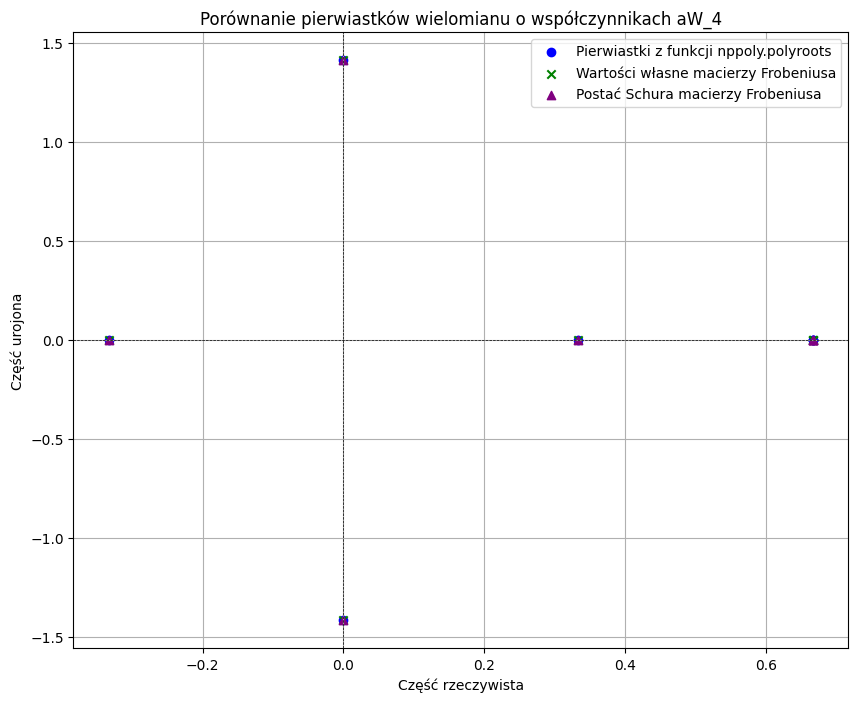

In [4]:
# ===== Twoja implementacja tutaj =====
aW_4 = [16, -72, -28, 558, -990, 783, -486, 243]
# poly
aW_4_roots = nppoly.polyroots(aW_4)
print("\nPierwiastki wielomianu:", aW_4_roots)
# Frobenius
aW_4_array = np.array(aW_4)
eigenvalues_aW4 = np.linalg.eigvals(main.frob_a(aW_4_array))
print("\nwartpości własne macierzy Frobeniusa:", eigenvalues_aW4)
# Schur
Schur_A_aW4 = sp.linalg.schur(main.frob_a(aW_4_array), output='complex')
Schur_aW4 = np.diag(Schur_A_aW4[0])
print("\nwartości własne postaci Schura macierzy Frobeniusa:", Schur_aW4)

plt.figure(figsize=(10,8))
plt.scatter(np.real(aW_4_roots), np.imag(aW_4_roots), color='blue', label='Pierwiastki z funkcji nppoly.polyroots')
plt.scatter(np.real(eigenvalues_aW4), np.imag(eigenvalues_aW4), color='green', marker='x', label='Wartości własne macierzy Frobeniusa')
plt.scatter(np.real(Schur_aW4), np.imag(Schur_aW4), color='purple', marker='^', label='Postać Schura macierzy Frobeniusa')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.title('Porównanie pierwiastków wielomianu o współczynnikach aW_4')
plt.xlabel('Część rzeczywista')
plt.ylabel('Część urojona')
plt.legend()
plt.grid()
plt.show()

Miejsca zerowe wyliczone wszystkimi trzema metodami są obarczone błędem. Część miejsc zerowych obliczony przy użyciu dwóch sposobów wyliczania wartości własnych pokrywa się ze sobą. W zadaniu drugim, mieliśmy dokładne miejsca zerowe, tutaj ich nie ma. Z tego powodu oraz ze względu na małe rozbieżności względem wynikami, uznano że te metody dobrze spełniają postawione przed nimi zadania. 

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [5]:
# ===== Twoja implementacja tutaj =====
#punkt 1
A_10 = []
A_20 = []
A_30 = []
n = [10, 20, 40]
for i in range(1,11):
    A_10.append(2**i)
for i in range(1,21):
    A_20.append(2**i)
for i in range(1,31):
    A_30.append(2**i)
print("Współczynniki wielomianu o pierwiastkach 2^1, 2^2, ..., 2^10:", A_10)
print("Współczynniki wielomianu o pierwiastkach 2^1, 2^2, ..., 2^20:", A_20)
print("Współczynniki wielomianu o pierwiastkach 2^1, 2^2, ..., 2^40:", A_30)
#macierze diagonalne
A_10_diag = np.diag(A_10)
print("Macierz diagonalna dla n=10:\n", A_10_diag)
A_20_diag = np.diag(A_20)
A_30_diag = np.diag(A_30)
#wartości własne
A_10_eivalues = np.linalg.eigvals(A_10_diag)
A_20_eivalues = np.linalg.eigvals(A_20_diag)
A_30_eivalues = np.linalg.eigvals(A_30_diag)
print("Wartości własne macierzy diagonalnej dla n=10:", A_10_eivalues)
print("Wartości własne macierzy diagonalnej dla n=20:", A_20_eivalues)
print("Wartości własne macierzy diagonalnej dla n=30:", A_30_eivalues)
if sorted(A_10) == sorted(A_10_eivalues):
    print("Dla n=10 wartości własne zgadzają się z pierwiastkami.")
if sorted(A_20) == sorted(A_20_eivalues):
    print("Dla n=20 wartości własne zgadzają się z pierwiastkami.")
if sorted(A_30) == sorted(A_30_eivalues):
    print("Dla n=30 wartości własne zgadzają się z pierwiastkami.")

Współczynniki wielomianu o pierwiastkach 2^1, 2^2, ..., 2^10: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
Współczynniki wielomianu o pierwiastkach 2^1, 2^2, ..., 2^20: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]
Współczynniki wielomianu o pierwiastkach 2^1, 2^2, ..., 2^40: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824]
Macierz diagonalna dla n=10:
 [[   2    0    0    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0]
 [   0    0    8    0    0    0    0    0    0    0]
 [   0    0    0   16    0    0    0    0    0    0]
 [   0    0    0    0   32    0    0    0    0    0]
 [   0    0    0    0    0   64    0    0    0    0]
 [   0    0    0    0    0    0  128    0    0    0]
 [   0    0    0    0    0    0    0  

In [6]:
#Punkt 2
#n = 10
check = False
while not check:
    P_10 = np.diag(np.random.randint(1,100,(10)))
    check = main.is_nonsingular(P_10)
print(P_10)
print('Utworzona macierz P nie jest singularna!\n')
#n = 20
check = False
while not check:
    P_20 = np.diag(np.random.randint(1,100,(20)))
    check = main.is_nonsingular(P_20)
print('Utworzona macierz P nie jest singularna!\n')
#n = 30
check = False
while not check:
    P_30 = np.diag(np.random.randint(1,100,(30)))
    check = main.is_nonsingular(P_30)
print('Utworzona macierz P nie jest singularna!\n')
# B_n
B_10 = P_10 @ A_10_diag @ np.linalg.inv(P_10)
B_20 = P_20 @ A_20_diag @ np.linalg.inv(P_20)
B_30 = P_30 @ A_30_diag @ np.linalg.inv(P_30)

eigvals_B_10 = np.linalg.eigvals(B_10)
eigvals_B_20 = np.linalg.eigvals(B_20)
eigvals_B_30 = np.linalg.eigvals(B_30)

if sorted(A_10) == sorted(eigvals_B_10):
    print('Wartości własne utworzonej macierzy B_10 SĄ zgodne z wartościami analitycznymi!\n')
else:
    print('Wartości własne utworzonej macierzy B_10 NIE są zgodne z wartościami analitycznymi!\n')
if sorted(A_20) == sorted(eigvals_B_20):
    print('Wartości własne utworzonej macierzy B_20 SĄ zgodne z wartościami analitycznymi!\n')
else:
    print('Wartości własne utworzonej macierzy B_20 NIE są zgodne z wartościami analitycznymi!\n')
if sorted(A_30) == sorted(eigvals_B_30):
    print('Wartości własne utworzonej macierzy B_30 SĄ zgodne z wartościami analitycznymi!\n')
else:
    print('Wartości własne utworzonej macierzy B_30 NIE są zgodne z wartościami analitycznymi!\n')




[[35  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0 67  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 71  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0  0  0 52]]
Utworzona macierz P nie jest singularna!

Utworzona macierz P nie jest singularna!

Utworzona macierz P nie jest singularna!

Wartości własne utworzonej macierzy B_10 SĄ zgodne z wartościami analitycznymi!

Wartości własne utworzonej macierzy B_20 SĄ zgodne z wartościami analitycznymi!

Wartości własne utworzonej macierzy B_30 SĄ zgodne z wartościami analitycznymi!



In [7]:
#Punkt 3
Q_10, R_10 = np.linalg.qr(P_10)
C_10 = Q_10 @ A_10_diag @ np.linalg.inv(Q_10)
eigvals_C_10 = np.linalg.eigvals(C_10)

Q_20, R_20 = np.linalg.qr(P_20)
C_20 = Q_20 @ A_20_diag @ np.linalg.inv(Q_20)
eigvals_C_20 = np.linalg.eigvals(C_20)

Q_30, R_30 = np.linalg.qr(P_30)
C_30 = Q_30 @ A_30_diag @ np.linalg.inv(Q_30)
eigvals_C_30 = np.linalg.eigvals(C_30)

if sorted(A_10) == sorted(eigvals_C_10):
    print('Wartości własne utworzonej macierzy C_10 SĄ zgodne z wartościami analitycznymi!\n')
else:
    print('Wartości własne utworzonej macierzy C_10 NIE są zgodne z wartościami analitycznymi!\n')

if sorted(A_20) == sorted(eigvals_C_20):
    print('Wartości własne utworzonej macierzy C_20 SĄ zgodne z wartościami analitycznymi!\n')
else:
    print('Wartości własne utworzonej macierzy C_20 NIE są zgodne z wartościami analitycznymi!\n')

if sorted(A_30) == sorted(eigvals_C_30):
    print('Wartości własne utworzonej macierzy C_30 SĄ zgodne z wartościami analitycznymi!\n')
else:
    print('Wartości własne utworzonej macierzy C_30 NIE są zgodne z wartościami analitycznymi!\n')

#Punkt 4
# F_10
A_10_array = np.array(A_10)
F_10 = main.frob_a(A_10_array)
eigvals_F_10 = np.linalg.eigvals(F_10)
if sorted(A_10) == sorted(eigvals_F_10):
    print('Wartości własne utworzonej macierzy F_10 SĄ zgodne z wartościami analitycznymi!\n')
else:
    print('Wartości własne utworzonej macierzy F_10 NIE są zgodne z wartościami analitycznymi!\n')
#F_20
A_20_array = np.array(A_20)
F_20 = main.frob_a(A_20_array)
eigvals_F_20 = np.linalg.eigvals(F_20)
if sorted(A_10) == sorted(eigvals_F_10):
    print('Wartości własne utworzonej macierzy F_20 SĄ zgodne z wartościami analitycznymi!\n')
else:
    print('Wartości własne utworzonej macierzy F_20 NIE są zgodne z wartościami analitycznymi!\n')
#F_30
A_30_array = np.array(A_30)
F_30 = main.frob_a(A_30_array)
eigvals_F_30 = np.linalg.eigvals(F_30)
if sorted(A_10) == sorted(eigvals_F_10):
    print('Wartości własne utworzonej macierzy F_30 SĄ zgodne z wartościami analitycznymi!\n')
else:
    print('Wartości własne utworzonej macierzy F_30 NIE są zgodne z wartościami analitycznymi!\n')

print("PRZYKŁADOWO DLA N = 10\n")
print('A_10\n',A_10_diag)
print('P_10\n',P_10)
print('B_10\n',B_10)
print('Q_10\n',Q_10)
print('C_10\n',C_10)
print('F_10\n',F_10)



Wartości własne utworzonej macierzy C_10 SĄ zgodne z wartościami analitycznymi!

Wartości własne utworzonej macierzy C_20 SĄ zgodne z wartościami analitycznymi!

Wartości własne utworzonej macierzy C_30 SĄ zgodne z wartościami analitycznymi!

Wartości własne utworzonej macierzy F_10 NIE są zgodne z wartościami analitycznymi!

Wartości własne utworzonej macierzy F_20 NIE są zgodne z wartościami analitycznymi!

Wartości własne utworzonej macierzy F_30 NIE są zgodne z wartościami analitycznymi!

PRZYKŁADOWO DLA N = 10

A_10
 [[   2    0    0    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0]
 [   0    0    8    0    0    0    0    0    0    0]
 [   0    0    0   16    0    0    0    0    0    0]
 [   0    0    0    0   32    0    0    0    0    0]
 [   0    0    0    0    0   64    0    0    0    0]
 [   0    0    0    0    0    0  128    0    0    0]
 [   0    0    0    0    0    0    0  256    0    0]
 [   0    0    0    0    0    0    0    0  512  

Wnioski:
Wartości własne uzyskane na podstawie macierzy Frobeniusa różnią się od wartości analitycznych i stanowią jedynie ich przybliżenie, niezależnie od rozmiaru badanej macierzy. Oznacza to, że metoda ta obarczona jest znacznym błędem. Przekształcenia realizowane w oparciu o macierz diagonalną nie wpływają na jej wartości własne, co można zauważyć, porównując macierze A_n, B_n i C_n. Natomiast brak zgodności w przypadku największej macierzy B_n prawdopodobnie wynika z zaokrągleń i przybliżeń zastosowanych przy obliczaniu wyników, podobnie jak ma to miejsce w przypadku macierzy Frobeniusa.

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)